In [52]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [87]:
fname = "../scripts/output.pcap"
os.system('tshark -r %s -T fields -e ip.len -e frame.time_epoch > ../data/output.csv' % fname)
fname = "../data/output.csv"
df = pd.read_csv(fname, sep='\t', header=None)
df[2] = df[1].apply(lambda x: int(float(x)))
df = df.dropna()
df = df[~df[0].str.contains(',')]
df[0] = df[0].apply(lambda x: int(x))
df_grp = df.groupby(2).agg({0: sum}).reset_index()
df_grp[0] = df_grp[0] * 8 / 1000

In [90]:
def parse_traceroute(fname):
    content = open(fname).readlines()
    i = 1
    stat_list = []
    while i < len(content):
        timestamp = int(content[i][:-1])
        traceroute = content[i+1][:-1].split(' ')
        rtt_list = []
        for k in range(0, len(traceroute)):
            if traceroute[k] == "ms":
                rtt = float(traceroute[k-1])
                rtt_list.append(rtt)
        stat_list.append([timestamp, rtt_list])
        i += 2
    return stat_list
stat_list = parse_traceroute("../scripts/output.trt")
df_trt = pd.DataFrame(stat_list, columns=["ts", "rtt_l"])
df_trt['rtt_avg'] = df_trt['rtt_l'].apply(lambda x: np.mean(x))
df_trt['rtt_med'] = df_trt['rtt_l'].apply(lambda x: np.median(x))
df_trt['rtt_p75'] = df_trt['rtt_l'].apply(lambda x: np.percentile(x, 75))
df_trt['rtt_p25'] = df_trt['rtt_l'].apply(lambda x: np.percentile(x, 25))

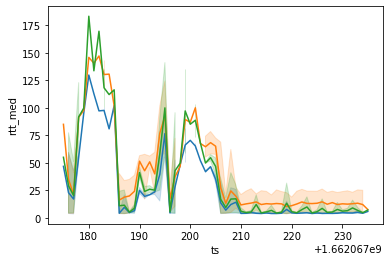

In [96]:
ax = sns.lineplot(x=df_trt["ts"], y=df_trt["rtt_med"])
ax=sns.lineplot(x=df_trt["ts"], y=df_trt["rtt_avg"], ax=ax)
ax=sns.lineplot(x=df_trt["ts"], y=df_trt["rtt_p75"], ax=ax)
#ax2 = ax.twinx()
#sns.lineplot(x=df_grp[2], y=df_grp[0], ax=ax2)